In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df=df.drop(columns=['Id'])
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.shape

(150, 5)

<AxesSubplot:>

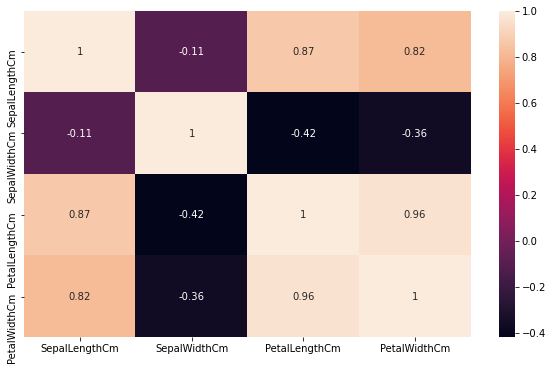

In [5]:
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [7]:
df["Species"].replace({"Iris-setosa": 2, "Iris-versicolor": 3, "Iris-virginica": 4}, inplace = True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


In [8]:
x=pd.DataFrame(df,columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]).values
y=df.Species.values.reshape(-1,1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42) 

In [11]:
k=7
clf=KNeighborsClassifier(k)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)*100

100.0

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



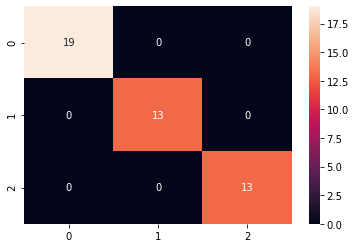

In [19]:
from sklearn.metrics import classification_report
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))